# 05과 범주형변수

<img src='https://github.com/DA4BAM/image/blob/main/%EB%8B%A8%EB%B3%80%EB%9F%89%EB%B6%84%EC%84%9D.png?raw=true' width=400/>

## 1.라이브러리 불러오기

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2.범주형변수의 기초 통계량

* 범주형 변수는 범주별 빈도수와 비율을 확인합니다.
* 리스트.count(‘값’) 
    * 해당 값이 몇 개 있는지 count 해 줍니다.
    * Count를 전체 개수(len(gender))로 나눠주면 비율이 됩니다.
    * 그런데, 범주가 두 세 개 정도면이렇게 계산하는 게 가능합니다.
    * 만약 범주가 10개라면?


1) 리스트를 이용한 기초통계량

In [3]:
gender = ['F','M','F','F','F','M','F','M','M']

f_cnt = gender.count('F')
m_cnt = gender.count('M')
total_cnt = len(gender)

print('F', f_cnt, f_cnt/total_cnt)
print('M', m_cnt, m_cnt/total_cnt)

F 5 0.5555555555555556
M 4 0.4444444444444444


2) 판다스를 이용한 기초통계량

* 판다스의 .value_counts()
    * 범주의 개수와 상관 없이 범주 별 개수를 count 해 줍니다.

In [4]:
gender = ['F','M','F','F','F','M','F','M','M']
gender = pd.Series(gender)

print(gender.value_counts())
print(gender.value_counts()/len(gender))

F    5
M    4
dtype: int64
F    0.555556
M    0.444444
dtype: float64


3) 데이터프레임으로 부터

In [5]:
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv')

print(titanic['Pclass'].value_counts())
print('-'*50)
print(titanic['Pclass'].value_counts()/len(titanic['Pclass']))

3    491
1    216
2    184
Name: Pclass, dtype: int64
--------------------------------------------------
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


* titanic['Pclass’] 해석
    * .value_counts()를 이용하여 범주별 빈도수와 범주별 비율을 구할수 있습니다.
    * 3등급 객실 탑승객이 전체에서 55% 차지합니다.
    * 1등급 객실이 24%, 2등급 객실이 20.7 % 



<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

1) 리스트로 부터 기초통계량 구하기

In [6]:
grade = ['A','A','B','A','B','B','B','C','C']

# 위 리스트의 각 값에 대한 기초통계량을 구해 봅시다.
grade = pd.Series(grade)

print(grade.value_counts())
print(grade.value_counts()/len(grade))

B    4
A    3
C    2
dtype: int64
B    0.444444
A    0.333333
C    0.222222
dtype: float64


2) 데이터 프레임으로 부터 기초통계량 구하기

In [7]:
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv')

# 성별에 대한 기초 통계량을 구해 봅시다.

print(titanic['Sex'].value_counts())
print('-'*50)
print(titanic['Sex'].value_counts()/len(titanic['Sex']))


male      577
female    314
Name: Sex, dtype: int64
--------------------------------------------------
male      0.647587
female    0.352413
Name: Sex, dtype: float64


## 3.범주형변수의 시각화 - bar chart

1) 기본 bar chart

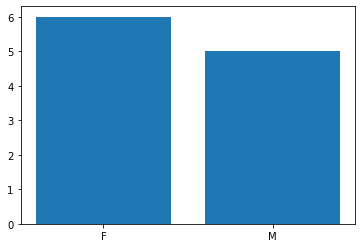

In [8]:
gender = ['F','M']
cnt = [6, 5]

plt.bar(gender, cnt)
plt.show()

2) bar chart 옆으로 그리기

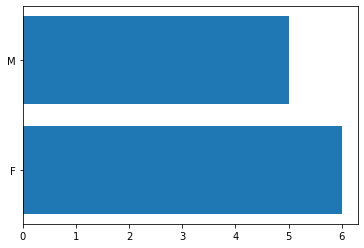

In [9]:
gender = ['F','M']
cnt = [6, 5]

plt.barh(gender, cnt)
plt.show()

3) 판다스 이용하기

* 범주 이름과 값이 필요하므로, 집계작업이 선행되어야 함.
* 판다스의 value_counts()를 사용하여 집계
    * 집계결과의 index : 범주 이름
    * 집계결과의 values : 값


[5 4]
Index(['F', 'M'], dtype='object')


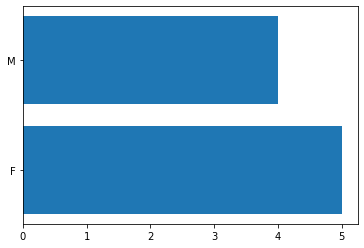

In [10]:
gender = ['F','M','F','F','F','M','F','M','M']
gender = pd.Series(gender)

cnt = gender.value_counts()
print(cnt.values)
print(cnt.index)

plt.barh(cnt.index, cnt.values)
plt.show()

4) 꾸미기 - 색깔, 간격

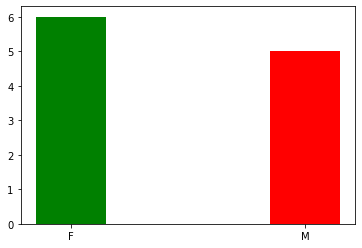

In [11]:
gender = ['F','M']
cnt = [6, 5]

plt.bar(gender, cnt, color = ['g','r'], width = .3)
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

1) titanic의 Pclass에 대한 bar chart를 그리시오.
* 색깔 : g, r, b 

3    491
1    216
2    184
Name: Pclass, dtype: int64


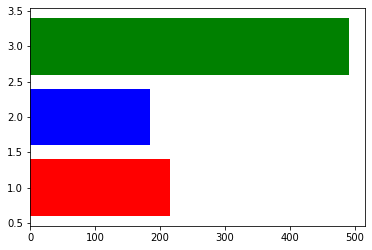

In [15]:
cnt=titanic['Pclass'].value_counts()

print(cnt)
plt.barh(cnt.index,cnt.values,color=['g','r','b'])
plt.show()

## 4.범주형변수의 시각화 - pie chart

* 범주별 비율 비교할 때 파이차트 사용.
* 역시 먼지 집계를 해야 합니다.
* plt.pie( 값, labels=범주이름, autopct = ‘%.2f%%’)
    * autopct = ‘%**.2f%**%’ : 그래프에 표시할 값 비율 값에 대한 설정입니다.
        * **.2f%** : 소수점 두 자리 퍼센트로 표기 한다는 의미.


1) pie chart 기본

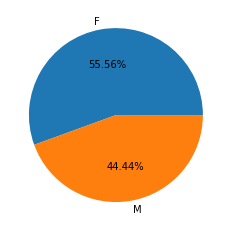

In [16]:
gender = ['F','M','F','F','F','M','F','M','M']
gender = pd.Series(gender)

cnt = gender.value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

2) pie chart 꾸미기 1

* 각도와 방향 조정
    * startangle = 90 : 90도 부터 시작
    * counterclock = False : 시계 방향으로

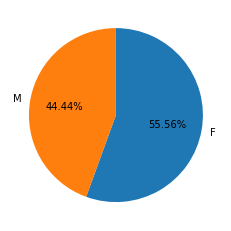

In [17]:
gender = ['F','M','F','F','F','M','F','M','M']
gender = pd.Series(gender)

cnt = gender.value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', 
        startangle=90, counterclock=False)
plt.show()

3) pie chart 꾸미기 2

* 간격 띄우고, 그림자 넣기
    * explode = [0.05, 0.05] : 중심으로 부터 F와 M 을 얼마만큼 띄울지
    * shadow = True : 그림자 추가



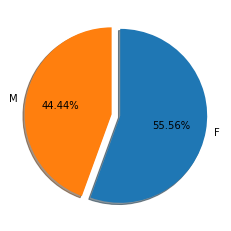

In [18]:
gender = ['F','M','F','F','F','M','F','M','M']
gender = pd.Series(gender)

cnt = gender.value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', 
        startangle=90, counterclock=False, 
        explode = [0.05, 0.05], shadow=True)
plt.show()


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

1) titanic의 Pclass에 대한 pie chart를 그리시오.
* 소수점 1자리까지 비율(%)를 표시하시오.

## 5.종합실습

### 1) Titanic

* url : 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'

**[titanic_simple 데이터 셋 정보]**

- PassengerId : 승객번호
- Survived : 생존여부(1:생존, 0:사망)
- Pclass : 객실등급(1:1등급, 2:2등급, 3:3등급)
- Name : 승객이름
- Sex : 성별(male, female)
- Age : 나이
- Fare : 운임($)
- Embarked : 승선지역(Southhampton, Cherbourg, Queenstown)

① 데이터를 불러와 봅시다.

In [19]:
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton


② 티켓 클래스(Pclass)의 범주별 빈도수와 범주별 비율을 구하시오.

In [22]:
print(titanic['Pclass'].value_counts())
print('-'*50)
print(titanic['Pclass'].value_counts()/len(titanic['Pclass']))

3    491
1    216
2    184
Name: Pclass, dtype: int64
--------------------------------------------------
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


③ 티켓 클래스(Pclass)의 범주별 빈도수를 구하고 bar chart와 pie chart를 주어진 결과에 맞게 그리시오.

3    491
1    216
2    184
Name: Pclass, dtype: int64


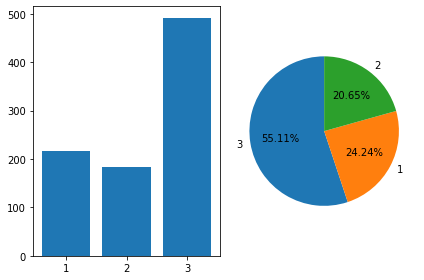

In [48]:
print(titanic['Pclass'].value_counts())
cnt = titanic['Pclass'].value_counts()

plt.subplot(1,2,1)
plt.bar(cnt.index,cnt.values)
plt.subplot(1,2,2)
plt.pie(cnt.values,labels=cnt.index,autopct='%.2f%%',startangle=90)
plt.tight_layout()
plt.show()

④ 위 분포로 부터 알수 있는 것은?

⑤ 탑승지역(Embarked)의 범주별 빈도수와 범주별 비율을 구하시오.

In [26]:
print(titanic['Embarked'].value_counts())
print('-'*50)
print(titanic['Embarked'].value_counts()/len(titanic['Embarked']))

Southhampton    644
Cherbourg       168
Queenstown       77
Name: Embarked, dtype: int64
--------------------------------------------------
Southhampton    0.722783
Cherbourg       0.188552
Queenstown      0.086420
Name: Embarked, dtype: float64


⑥ 탑승지역(Embarked)의 범주별 빈도수를 구하고 bar chart와 pie chart를 주어진 결과에 맞게 그리시오.

Southhampton    644
Cherbourg       168
Queenstown       77
Name: Embarked, dtype: int64


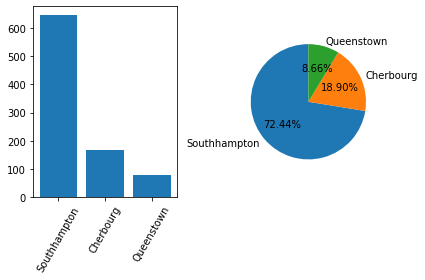

In [46]:
print(titanic['Embarked'].value_counts())
cnt = titanic['Embarked'].value_counts()

plt.subplot(1,2,1)
plt.bar(cnt.index,cnt.values)
plt.xticks(rotation=60)
plt.subplot(1,2,2)
plt.pie(cnt.values,labels=cnt.index,autopct='%.2f%%',startangle=90)
plt.tight_layout()
plt.show()

⑦ 위 분포로 부터 알수 있는 것은?

### 2) Attrition

* url : https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV

**[Attrition 데이터 셋 정보]**

|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, Yes , No	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	EmployNumber	|	사번	|	숫자	| 	|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|

① 데이터를 불러와 봅시다.

In [28]:
attr = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV')
attr.head()

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


② MaritalStatus	의 범주별 빈도수와 범주별 비율을 구하시오.

In [29]:
print(attr['MaritalStatus'].value_counts())
print('-'*50)
print(attr['MaritalStatus'].value_counts()/len(attr['MaritalStatus']))

Married     548
Single      384
Divorced    264
Name: MaritalStatus, dtype: int64
--------------------------------------------------
Married     0.458194
Single      0.321070
Divorced    0.220736
Name: MaritalStatus, dtype: float64


③ MaritalStatus의 범주별 빈도수를 구하고 bar chart와 pie chart를 주어진 결과에 맞게 그리시오.

Married     548
Single      384
Divorced    264
Name: MaritalStatus, dtype: int64


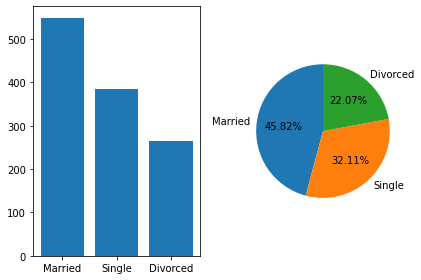

In [54]:
print(attr['MaritalStatus'].value_counts())
cnt = attr['MaritalStatus'].value_counts()

plt.subplot(1,2,1)
plt.bar(cnt.index,cnt.values)
plt.subplot(1,2,2)
plt.pie(cnt.values,labels=cnt.index,autopct='%.2f%%',startangle=90)
plt.tight_layout()
plt.show()

④ 위 분포로 부터 알수 있는 것은?

⑤ 직무만족도(JobSatisfaction)	의 범주별 빈도수와 범주별 비율을 구하시오.

In [33]:
print(attr['JobSatisfaction'].value_counts())
print('-'*50)
print(attr['JobSatisfaction'].value_counts()/len(attr['JobSatisfaction']))

4    373
3    354
1    243
2    226
Name: JobSatisfaction, dtype: int64
--------------------------------------------------
4    0.311873
3    0.295987
1    0.203177
2    0.188963
Name: JobSatisfaction, dtype: float64


⑥ 직무만족도(JobSatisfaction)의 범주별 빈도수를 구하고 bar chart와 pie chart를 주어진 결과에 맞게 그리시오.

4    373
3    354
1    243
2    226
Name: JobSatisfaction, dtype: int64


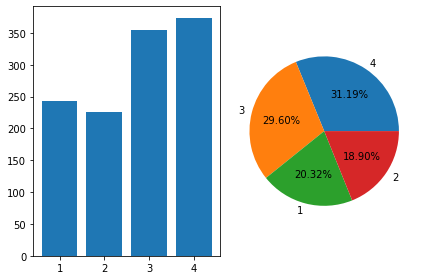

In [52]:
print(attr['JobSatisfaction'].value_counts())
cnt = attr['JobSatisfaction'].value_counts()

plt.subplot(1,2,1)
plt.bar(cnt.index,cnt.values)
plt.subplot(1,2,2)
plt.pie(cnt.values,labels=cnt.index,autopct='%.2f%%')
plt.tight_layout()
plt.show()

⑦ 위 분포로 부터 알수 있는 것은?